In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sb
import os
import string
%matplotlib inline

#### Abundace of major taxonomical groups

In [5]:
# Load the new dataframe and verify it
df = pd.read_csv('../4.Dataframe_AllColumn/C6_megahit_taxon.csv')
df.head(3)

,a,b,c,d,e,f,g,h,i,j,...,m,n,o,p,q,r,s,t,u,v
0,77315,root,cellular organisms,Bacteria,Acidobacteria,Solibacteres,Solibacterales,Solibacteraceae,Candidatus Solibacter,Candidatus Solibacter usitatus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51168,root,cellular organisms,Bacteria,PVC group,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobia subdivision 3,Pedosphaera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38786,root,cellular organisms,Bacteria,Acidobacteria,Acidobacteriia,Acidobacteriales,Acidobacteriaceae,unclassified Acidobacteriaceae,Acidobacteriaceae bacterium URHE0068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(20644, 22)

#### List the content of the columns

In [9]:
print('Content of columns:','\n','b: ',list(df['b'].unique()),'\n','c: ',list(df['c'].unique()),'\n',
      'd: ',list(df['d'].unique()),'\n''\n','e: ',list(df['e'].unique()))

Content of columns: 
 b:  ['root', 'Unclassified'] 
 c:  ['cellular organisms', 'Viruses', nan] 
 d:  ['Bacteria', 'Archaea', nan, 'environmental samples', 'Eukaryota', 'dsDNA viruses, no RNA stage', 'unclassified bacterial viruses', 'unclassified viruses', 'Retro-transcribing viruses', 'unclassified virophages', 'ssRNA viruses', 'ssDNA viruses', 'dsRNA viruses'] 

 e:  ['Acidobacteria', 'PVC group', nan, 'Euryarchaeota', 'environmental samples', 'Proteobacteria', 'FCB group', 'unclassified Bacteria', 'Terrabacteria group', 'Elusimicrobia', 'Nitrospirae', 'Spirochaetes', 'DPANN group', 'TACK group', 'Nitrospinae/Tectomicrobia group', 'Calditrichaeota', 'uncultured Mediterranean phage uvMED', 'Asgard group', 'Balneolaeota', 'Synergistetes', 'Alveolata', 'unclassified Archaea', 'Thermodesulfobacteria', 'Deferribacteres', 'Aquificae', 'Thermotogae', 'Cryptophyta', 'Amoebozoa', 'Dictyoglomi', 'Chrysiogenetes', 'Heterolobosea', 'Haptophyceae', 'Caudovirales', 'Viridiplantae', 'Fusobacteria'

#### Calculating Abundances

In [10]:
unclassified = df.loc[df['b'].str.contains('Unclassified', regex=True)]
unclass_Ab = unclassified['a'].sum()
unclass_Ab

745622

In [11]:
classified = df.loc[df['b'].str.contains('root', regex=True)]
class_Ab = classified['a'].sum()
class_Ab

1391206

In [13]:
cellOrg = df.loc[df['c'].str.contains('cellular', na=False)]
cellOrg_Ab = cellOrg['a'].sum()
cellOrg_Ab

1389913

In [14]:
virus = df.loc[df['c'].str.contains('Viruses', na=False)]
virus_Ab = virus['a'].sum()
virus_Ab

1184

In [24]:
bacteria = df.loc[df['d'].str.contains('Bacteria', na=False)]
bact_Ab = bacteria['a'].sum()
bact_Ab

1345011

In [25]:
archaea = df.loc[df['d'].str.contains('Archaea', na=False)]
arch_Ab = archaea['a'].sum()
arch_Ab

38027

In [26]:
eukarya = df.loc[df['d'].str.contains('Eukaryota', na=False)]
euka_Ab = eukarya['a'].sum()
euka_Ab

5817

In [27]:
environmSample = df.loc[df['d'].str.contains('environmental samples', na=False)]  # Not visualized in Kona graph
envSam_Ab = environmSample['a'].sum()
envSam_Ab

285

In [28]:
unclassVirus = df.loc[df['d'].str.contains('unclassified viruses', na=False)]
unclassVirus_Ab = unclassVirus['a'].sum()
unclassVirus_Ab

37

In [29]:
unclassBact = df.loc[df['e'].str.contains('unclassified Bacteria', na=False)]
unclassBact_Ab = unclassBact['a'].sum()
unclassBact_Ab

61253

In [30]:
unclassArchaea = df.loc[df['e'].str.contains('unclassified Archaea', na=False)]
unclassArchaea_Ab = unclassArchaea['a'].sum()
unclassArchaea_Ab

741

In [31]:
unclassEukaryotes = df.loc[df['e'].str.contains('unclassified eukaryotes', na=False)]
unclassEukaryotes_Ab = unclassEukaryotes['a'].sum()
unclassEukaryotes_Ab

1

In [32]:
acidoBact = df.loc[df['e'].str.contains('Acidobacteria', na=False)]
acBac_Ab = acidoBact['a'].sum()
acBac_Ab

358488

In [33]:
proteoBact = df.loc[df['e'].str.contains('Proteobacteria', na=False)]
protBac_Ab = proteoBact['a'].sum()
protBac_Ab

382001

In [34]:
terraBac = df.loc[df['e'].str.contains('Terrabacteria group', na=False)]
terraBac_Ab = terraBac['a'].sum()
terraBac_Ab

192824

In [35]:
euryArchaeota = df.loc[df['e'].str.contains('Euryarchaeota', na=False)]
euryArchaeota_Ab = euryArchaeota['a'].sum()
euryArchaeota_Ab

31041

In [39]:
spirochaetes = df.loc[df['e'].str.contains('Spirochaetes', na=False)]
spirochaetes_Ab = spirochaetes['a'].sum()
spirochaetes_Ab

12245

In [40]:
alveolata = df.loc[df['e'].str.contains('Alveolata', na=False)]
alveolata_Ab = alveolata['a'].sum()
alveolata_Ab

704

In [41]:
rhizaria = df.loc[df['e'].str.contains('Rhizaria', na=False)]
rhizaria_Ab = rhizaria['a'].sum()
rhizaria_Ab

78

In [43]:
opisthokonta = df.loc[df['e'].str.contains('Opisthokonta', na=False)]
opisthokonta_Ab = opisthokonta['a'].sum()
opisthokonta_Ab   

3289

In [44]:
euglenozoa = df.loc[df['e'].str.contains('Euglenozoa', na=False)]
euglenozoa_Ab = euglenozoa['a'].sum()
euglenozoa_Ab

126

In [45]:
## Calculating percentages

total = unclass_Ab+class_Ab
unclass = unclass_Ab*100/total
clas = class_Ab*100/total
cellOrg = cellOrg_Ab*100/total
virus = virus_Ab*100/total
bact = bact_Ab*100/total
arch = arch_Ab*100/total
euka = euka_Ab*100/total
envSamples = envSam_Ab*100/total
unclassVirus = unclassVirus_Ab*100/total
unclassBact = unclassBact_Ab*100/total
unclassArch = unclassArchaea_Ab*100/total
unclassEuka = unclassEukaryotes_Ab*100/total
acidoBact = acBac_Ab*100/total
proteoBact = protBac_Ab*100/total
terraBact = terraBac_Ab*100/total
euryarchaeota = euryArchaeota_Ab*100/total
spirochaetes = spirochaetes_Ab*100/total
alveolata = alveolata_Ab*100/total
rhizaria = rhizaria_Ab*100/total
opisthokonta = opisthokonta_Ab*100/total
euglenozoa = euglenozoa_Ab*100/total

In [46]:
total

2136828

#### Summarizing previous data and plotting

In [47]:
"""Change the dictionary column name to correspond to the file being used"""

'Change the dictionary column name to correspond to the file being used'

In [48]:
majorTax = {'Taxonomy':['Unclassified','Classified','Cellular Organisms','Viruses','Bacteria','Archaea','Eukaryotes','Environmental Samples','Unclassified Viruses','Unclassified Bacteria','Unclassified Archaea','Unclassified Eukaryotes','Acidobacteria','Proteobacteria','Terrabacteria','Euryarchaeota','Spirochaetes','Alveolata','Rhizaria','Opistokhonta','Euglenozoa'],
            'Abundance':[unclass_Ab,class_Ab,cellOrg_Ab,virus_Ab,bact_Ab,arch_Ab,euka_Ab,envSam_Ab,unclassVirus_Ab,unclassBact_Ab,unclassArchaea_Ab,unclassEukaryotes_Ab,acBac_Ab,protBac_Ab,terraBac_Ab,euryArchaeota_Ab,spirochaetes_Ab,alveolata_Ab,rhizaria_Ab,opisthokonta_Ab,euglenozoa_Ab],
            'Abundance_perc':[unclass,clas,cellOrg,virus,bact,arch,euka,envSamples,unclassVirus,unclassBact,unclassArch,unclassEuka,acidoBact,proteoBact,terraBact,euryarchaeota,spirochaetes,alveolata,rhizaria,opisthokonta,euglenozoa]}

In [49]:
majorTax_df = pd.DataFrame.from_dict(majorTax)
"""This dataframe values were compared with the reported by Kona (using kaiju input) and they coincide"""

'This dataframe values were compared with the reported by Kona (using kaiju input) and they coincide'

### Save the created dataframe into a new file

In [30]:
# Change the file NAME FIRST and run all the processes again, make sure to change file names when pertinent.

In [35]:
"""CHANGE THE FILE NAME"""
majorTax_df.to_csv('../6.GeneralAnalysis/C6_megahit_taxon_Abundance.csv',index = False)

In [50]:
# Load the dataframe
df1 = pd.read_csv('../6.GeneralAnalysis/C6_megahit_taxon_Abundance.csv')
df1.head(3)

,Taxonomy,C6-megahit,C6-megahit_perc
0,Unclassified,745622,34.893871
1,Classified,1391206,65.106129
2,Cellular Organisms,1389913,65.045619


### Plotting the organized data

In [38]:
df1 = df1.sort_values('Abundance_perc', ascending = False)
df1

,Taxonomy,Abundance,Abundance_perc
1,Classified,1391206,65.106129
2,Cellular Organisms,1389913,65.045619
4,Bacteria,1345011,62.944280
0,Unclassified,745622,34.893871
13,Proteobacteria,382001,17.877012
12,Acidobacteria,358488,16.776643
14,Terrabacteria,192824,9.023843
9,Unclassified Bacteria,61253,2.866539
5,Archaea,38027,1.779600
15,Euryarchaeota,31041,1.452667


Text(0, 0.5, 'Major Taxonomic Groups')

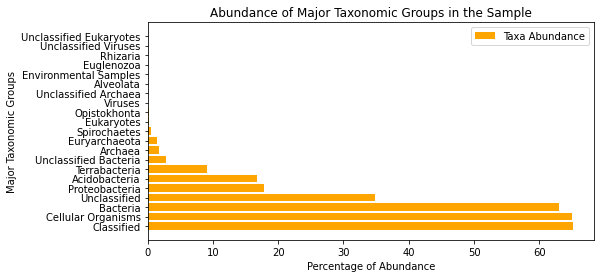

In [39]:
plt.figure(figsize=(8, 4))
plt.barh(df1.Taxonomy, df1.Abundance_perc, label='Taxa Abundance',color='orange')
plt.title("Abundance of Major Taxonomic Groups in the Sample")
plt.legend()
plt.xlabel("Percentage of Abundance")
plt.ylabel("Major Taxonomic Groups")

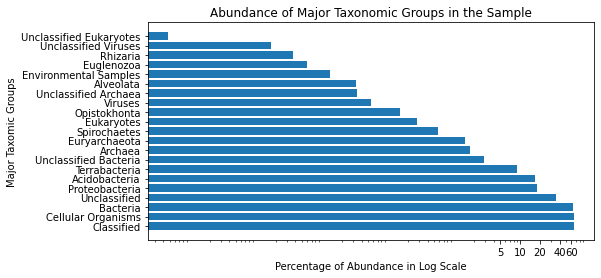

In [40]:
plt.figure(figsize=(8, 4)) # This allows me to change the figure size, so the data is not cramped.
plt.barh(df1.Taxonomy, df1.Abundance_perc)
plt.xscale('log')
plt.ylabel('Major Taxomic Groups')
plt.xlabel('Percentage of Abundance in Log Scale')
plt.title('Abundance of Major Taxonomic Groups in the Sample')
tick_val = [5,10,20,40,60]
tick_lab = ['5','10','20','40','60']
plt.xticks(tick_val, tick_lab)
plt.show()

<AxesSubplot:xlabel='Taxonomy', ylabel='Abundance_perc'>

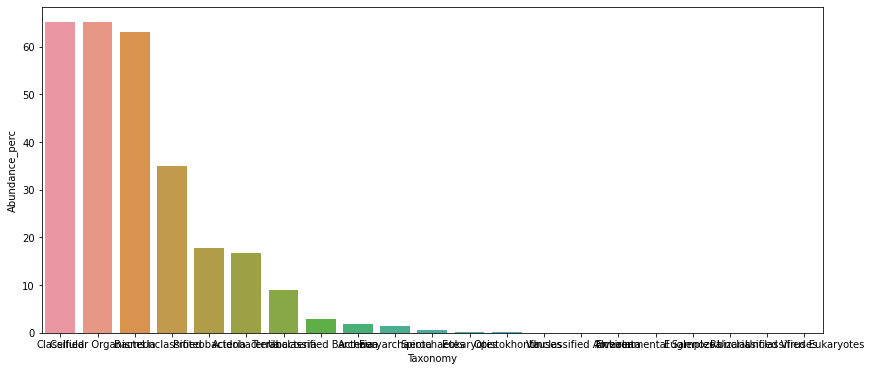

In [41]:
plt.figure(figsize=(14, 6))
sb.barplot(y =df1.Abundance_perc, x = df1.Taxonomy, data = df1)

Text(0.5, 1.0, 'Abundance of Major Taxonomic Groups in the Sample')

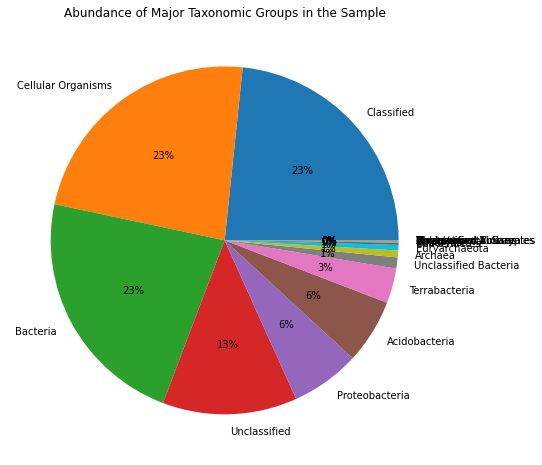

In [42]:
plt.figure(figsize=(8, 8))
abundances = df1.Abundance_perc
taxonomy = df1.Taxonomy
plt.pie(abundances, labels=taxonomy, autopct='%0.0f%%', radius=1)
plt.title("Abundance of Major Taxonomic Groups in the Sample")